# import

In [ ]:
import sys
print(sys.version)
print(sys.executable)

In [ ]:
!which python

In [ ]:
!which python2

In [ ]:
!which python3

In [6]:
import matplotlib.dates as mdates
from matplotlib import dates as mpl_dates

from matplotlib.pyplot import MultipleLocator
import matplotlib.dates as mdates
from matplotlib.transforms import Transform
from matplotlib.ticker import (AutoLocator, AutoMinorLocator)
from matplotlib.dates import DateFormatter
import datetime

import astropy.units as u
from astropy.time import Time
from collections import OrderedDict

In [7]:
from astropy.io import fits
import astropy.coordinates as coord
from astropy import units as u
from astropy.coordinates import SkyCoord

from astropy.table import Table
from astropy.wcs import WCS
import astropy.units as u
from astropy import constants as const
from astropy import units as u
from astropy.constants import k_B

import time
import numpy as np
import matplotlib
from matplotlib import pyplot
import math

import os,sys


%matplotlib inline
%config InlineBackend.figure_format = "svg"
from matplotlib import rcParams
#rcParams["savefig.dpi"] = 300

In [ ]:
gpstime=Time(1207736424, format='gps') 
Time(gpstime.mjd,format='mjd').to_datetime()

In [ ]:
Time(gpstime.mjd,format='mjd')

In [8]:
from __future__ import absolute_import, print_function, division
from astropy.io import fits
import sys,os  #引入模块
from astropy.io.fits import getheader
from astropy.io.fits import getdata
import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from matplotlib import cm
from matplotlib import rcParams
from astropy.utils.data import get_pkg_data_filename
import aplpy
from matplotlib.patches import Circle, Rectangle, Ellipse, Polygon, FancyArrow
from matplotlib.collections import PatchCollection, LineCollection
from astropy import log#%matplotlib inline

In [ ]:
print(aplpy.__version__)

# def

In [9]:
import matplotlib as mpl
def set_ax_tick(ax):
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on',)
    ax.xaxis.set_tick_params(which='minor', size=5, width=2, direction='in', top='on')
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
    ax.yaxis.set_tick_params(which='minor', size=5, width=2, direction='in', right='on')

def set_ax_locator(ax,xma=1,xmi=0.2,yma=1,ymi=0.2):
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(xma))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(xmi))
    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(yma))
    ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(ymi)) 

In [10]:
def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y



def datenums2mjd(x):
    #x=mdates.date2num(x)
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y = x - mjd_minus_mdates_num   
    return y

def mjd2numsdate(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    y= x + mjd_minus_mdates_num
    #y= mdates.num2date(y)
    return y

In [11]:
def datetime2mjd(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    
    x=mdates.date2num(x)
    y = x - mjd_minus_mdates_num   
    return y

def mjd2datetime(x):
    mjd_ref=59000
    mjd_minus_mdates_num=mdates.date2num(convert_xaxis_time(mjd_ref))-mjd_ref
    y= x + mjd_minus_mdates_num
    y= mdates.num2date(y)
    return y

def newdatetime2mjd(x):     
    return Time(x).mjd 

def mjd2datetimenew(x):
    return Time(x,format='mjd').to_datetime()

## gpstime

In [ ]:
obsid=1198598960
mjd=Time(obsid, format='gps').mjd
mjd

In [ ]:
Time(obsid, format='gps').to_datetime()

In [ ]:
obsid=1206120560

Time(obsid, format='gps').to_datetime()

## get_obsids

In [12]:
import os,sys,re
import time
#from datetime import datetime
import numpy as np
from astropy.io import fits

def get_obsids(path):
    dirname=os.listdir(path)
    obsids=[]
    for i in dirname:
        if i.isdigit():
            obsids.append(i)
    obsids.sort()        
    return obsids

def get_flag_tiles(metafits_file):
    flag_tiles=[]
    metafits=fits.open(metafits_file)
    for i,j in zip(metafits[1].data['Antenna'],metafits[1].data['Flag']):
        if j==1:
        #print(i,j)
            if i not in flag_tiles:
                flag_tiles.append(i)
    return flag_tiles

## def get_freq

In [13]:
def get_freq_of_file(fits_image_filename):
    fits_image_filename_hdu = fits.open(fits_image_filename)
    #fits_image_filename_hdu = fits.open(fits_image_filename)
    return int(fits_image_filename_hdu[0].header['CRVAL3'])

In [14]:
def get_freq_err_of_of_file(stokes_file_I):
    if os.path.exists(stokes_file_I):
        hdl_stokes_I=fits.open(stokes_file_I)            
        return int(hdl_stokes_I[0].header['CRVAL3']*u.Hz.to(u.MHz)),int(hdl_stokes_I[0].header['CDELT3']*u.Hz.to(u.MHz))

In [15]:
def get_stokes_file_of_obsid(path,obsid,prefix='first'):    
    stokes_file_I=os.path.join(path,obsid,'stokes-%s-%s-I.fits'%(obsid,prefix))
    if os.path.exists(stokes_file_I):       
        return stokes_file_I
    else:
        return False

In [16]:
def get_freq_of_obsid(path,obsid):
    #fits_image_filename=get_stokes_file(path,obsid)
    fits_image_filename=os.path.join(path,obsid,'%s.metafits'%obsid)
    fits_image_filename_hdu = fits.open(fits_image_filename)
    #fits_image_filename_hdu = fits.open(fits_image_filename)
    return int(fits_image_filename_hdu[0].header['CRVAL3']*u.Hz.to(u.MHz))

## within5deg obsinfo

In [17]:
within5deg_obsinfo=pd.read_csv('/share/home/blv/mwa_code_py/G0044_PKS0736_5deg.csv')

In [ ]:
within5deg_obsinfo.columns

In [ ]:
within5deg_obsinfo[within5deg_obsinfo['#obsid']==1207652304]

In [ ]:
within5deg_obsinfo[within5deg_obsinfo['#obsid']==1207652304]['freq']

In [ ]:
within5deg_obsinfo[within5deg_obsinfo['#obsid']==1207652424]

In [ ]:
within5deg_obsinfo[within5deg_obsinfo['#obsid']==1207652424]['freq']

In [18]:
freq_inits=[]
for i in within5deg_obsinfo['freq']:
    if i not in freq_inits:
        freq_inits.append(i)

In [19]:
len(within5deg_obsinfo)

490

In [73]:
freq_inits

[109, 81, 57, 157, 133]

### divide_by_freq_channel

In [ ]:
for j in freq_inits:
    path_freq_j=os.path.join(path_zip,str(j))
    if not os.path.exists(path_freq_j):
        os.mkdir(path_freq_j)

In [22]:
pwd

'/share/home/blv/mwa_code_py/ipynb'

In [ ]:
for index,obsid in enumerate(within5deg_obsinfo['#obsid']):
    freq=within5deg_obsinfo['freq'][index]
    print(obsid,freq) 
    #print('mv %s/%s_ms.zip %s/%s'%(path_zip,obsid,path_zip,freq))
    #print()
    os.system('mv %s/%s_ms.zip %s/%s'%(path_zip,obsid,path_zip,freq))

# skymodel

In [28]:
ra_PKS0736=114.825
dec_PKS0736=1.618

In [30]:
npoint_cal=100
jy_select=4

skymodel_fitsfile='/share/home/blv/MWAdata/qguo_data/skymodels/1207652304_srclist_cal_100.fits'
skymodelhdul_100 = fits.open(skymodel_fitsfile)
skymodelhdul_100.info()
skymodeldata_100=skymodelhdul_100[1].data
ra_100_4Jy=skymodeldata_100[skymodeldata_100['peak_flux']>jy_select]['ra']
dec_100_4Jy=skymodeldata_100[skymodeldata_100['peak_flux']>jy_select]['dec']

print('ra_100_4Jy',len(ra_100_4Jy))

Filename: /share/home/blv/MWAdata/qguo_data/skymodels/1207652304_srclist_cal_100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     30   100R x 11C   [14A, D, D, 10A, 9A, D, D, D, D, D, D]   
ra_100_4Jy 54


In [35]:
npoint_cal=1000
obsid=1207652304

skymodel_fitsfile_1000='/share/home/blv/MWAdata/qguo_data/skymodels/srclist_pumav3_EoR0aegean_EoR1pietro+ForA_%s_aocal%s.fits'%(obsid,npoint_cal)
skymodelhdul_1000 = fits.open(skymodel_fitsfile_1000)
skymodelhdul_1000.info()
skymodeldata_1000=skymodelhdul_1000[1].data

skymodeldata_select_infield=skymodeldata_1000[skymodeldata_1000['ra']<117]
skymodeldata_select_infield=skymodeldata_select_infield[skymodeldata_select_infield['ra']>113]
skymodeldata_select_infield=skymodeldata_select_infield[skymodeldata_select_infield['dec']>0]
skymodeldata_select_infield=skymodeldata_select_infield[skymodeldata_select_infield['dec']<4]

print('infield',len(skymodeldata_select_infield))

skymodeldata_select_infield_1Jy=skymodeldata_select_infield[skymodeldata_select_infield['peak_flux']>1]

print('infield_1jy',len(skymodeldata_select_infield_1Jy))

ras_infield_1Jy=skymodeldata_select_infield_1Jy['ra']
decs_infield_1Jy=skymodeldata_select_infield_1Jy['dec']
names_infield_1Jy=skymodeldata_select_infield_1Jy['Name']

#fig.show_markers(ras, decs, layer='marker_set_2', edgecolor='red',facecolor='none', marker='o', s=50, alpha=1.0)

for index,(ra_,dec_,name_,peak_f_) in enumerate(zip(ras_infield_1Jy,decs_infield_1Jy,names_infield_1Jy,skymodeldata_select_infield_1Jy['peak_flux'])):
    print(index,'%.4f,%.4f,%s'%(ra_,dec_,name_),peak_f_)
    #fig.add_label(ra_,dec_,'%.3f,%.3f'%(ra_,dec_),color='yellow',fontsize=14)

skymodeldata_select_center=skymodeldata_1000[skymodeldata_1000['ra']<125]
skymodeldata_select_center=skymodeldata_select_center[skymodeldata_select_center['ra']>113]
skymodeldata_select_center=skymodeldata_select_center[skymodeldata_select_center['dec']>0]
skymodeldata_select_center=skymodeldata_select_center[skymodeldata_select_center['dec']<12]

skymodeldata_select_center_3Jy=skymodeldata_select_center[skymodeldata_select_center['peak_flux']>3]
ra_center_3Jy=skymodeldata_select_center_3Jy['ra']
dec_center_3Jy=skymodeldata_select_center_3Jy['dec']
print('center_3Jy',len(ra_center_3Jy))

Filename: /share/home/blv/MWAdata/qguo_data/skymodels/srclist_pumav3_EoR0aegean_EoR1pietro+ForA_1207652304_aocal1000.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     30   1000R x 11C   [14A, D, D, 10A, 9A, D, D, D, D, D, D]   
infield 63
infield_1jy 12
0 116.2683,2.0028,J074504+020010 24.63
1 113.4783,2.0394,J073354+020223 12.33
2 114.8250,1.6181,J073918+013708 1.82
3 113.6417,3.2539,J073433+031515 2.63
4 115.2054,1.7144,J074049+014257 1.78
5 115.6833,1.0986,J074244+010602 1.34
6 116.0254,3.0308,J074406+030157 1.55
7 115.5004,0.8681,J074200+005211 1.32
8 114.6121,2.0753,J073826+020438 1.1
9 116.2446,3.3800,J074458+032253 1.02
10 114.4879,1.6189,J073757+013705 1.19
11 113.4754,3.9931,J073353+035936 1.14
center_3Jy 26


In [ ]:
## gen_model

obsid=1207652304
npoint_cal=1000
msfile=obsid
print('python2 srclist_by_beam.py -x --aocalibrate -m %s.metafits -n %d -s srclist_pumav3_EoR0aegean_EoR1pietro+ForA.txt'%(msfile,npoint_cal))    

## model2fits

obsid=1207652304
npoint_cal=100
print('python model2fits.py srclist_pumav3_EoR0aegean_EoR1pietro+ForA_%s_aocal%s.txt'%(obsid,npoint_cal))

obsid=1207652304
npoint_cal=1000
print('python model2fits.py srclist_pumav3_EoR0aegean_EoR1pietro+ForA_%s_aocal%s.txt'%(obsid,npoint_cal))

## vo2model

obsid=1207652304
npoint_cal=100
print('python2 vo2model_py2.py --catalogue srclist_pumav3_EoR0aegean_EoR1pietro+ForA_%s_aocal%s.fits --output srclist_pumav3_EoR0aegean_EoR1pietro+ForA_%s_aocal%s.txt'%(obsid,npoint_cal,obsid,npoint_cal))

python2 vo2model_py2.py --catalogue 



In [ ]:
## plot_skymodel

fig, ax = plt.subplots()
jy_select=0.01
print(len(skymodeldata[skymodeldata['peak_flux']>jy_select]))
cax=plot_skymodel_cmap(skymodeldata[skymodeldata['peak_flux']>jy_select],obsid=1207650864)
cbar = fig.colorbar(cax, ticks=[0, 10, 20,30,40,50])
#cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])  # vertically oriented colorbar
#ax.set_xlim(0,50)

# def PATH

In [26]:
path_img='/share/home/blv/MWAdata/qguo_data/img'
casaimg='/share/home/blv/MWAdata/qguo_data/casa_img/'
casaimg_done_path='/share/home/blv/MWAdata/qguo_data/casa_img/done'
casaimg_nan_path='/share/home/blv/MWAdata/qguo_data/casa_img/nan'

#path_done='/share/home/blv/MWAdata/qguo_data/G0044/within5deg/'
#path_nan='/share/home/blv/MWAdata/qguo_data/G0044/nan_within5deg'

path_lc='/share/home/blv/MWAdata/qguo_data/lightcurve/'
path_aocal='/share/home/blv/MWAdata/qguo_data/aocal_plot_bin/'

path_spec='/share/home/blv/MWAdata/qguo_data/spec/'
path_skymodel='/share/home/blv/MWAdata/qguo_data/skymodels'
path_zip='/share/home/blv/MWAdata/qguo_data/zip/'

path_157='/share/home/blv/MWAdata/qguo_data/zip/157/'
obsids_157=get_obsids(path_157)
#obsid=obsids_157[0]


In [25]:
create_skymodels_dir='/share/home/blv/mwa_code_py/for_hp/skymodel/scripts'
for i in os.listdir(create_skymodels_dir):
    if i.endswith('metafits'):
        metafits_name=os.path.join(create_skymodels_dir,i)
        metafits_hdul=fits.open(metafits_name)
        print(i[:-9],metafits_hdul[0].header['FREQCENT'])
        #print(i)

1207652304 215.68
1207652784 184.96
1207652544 118.4
1207652664 154.24
1207652424 87.68


In [24]:
datadirs_root='/share/home/blv/MWAdata/qguo_data/G0044/'
datadirs=os.listdir(datadirs_root)
datadirs=sorted(datadirs)
datadirs

['3c273.reg',
 'CenA.reg',
 'HydA.reg',
 'M87.reg',
 'PKS0736_nearby.reg',
 'PKS0736_peel_01.reg',
 'PKS0736_peel_02.reg',
 'PKS0736_peel_03.reg',
 'PKS0736_src.reg',
 'PicA.reg',
 'check_down_and_unzip_py2.py',
 'done_0504.txt',
 'ds9plot_image.py',
 'gen_bat_part.py',
 'gen_sh_bsub.py',
 'get_length_argv.py',
 'nan_within5deg_0504.txt',
 'obsnum_step_all_1208601904_time_04-19-22h56m03s_to_04-20-00h42m01s.txt',
 'within5deg.txt']

# aplpy_plot

## plot_image_dddd

In [ ]:
def plot_image_dddd(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS0736+01'):
    fits_image_filename_hdu = fits.open(fits_image_filename)
    fits_image_filename_hdu[0].data *= 1e3

    del fits_image_filename_hdu[0].header['*[34]']
    fits_image_filename_hdu[0].header['NAXIS']=2
    fits_image_filename_hdu[0].data = fits_image_filename_hdu[0].data[0][0]
        
    fig_0 = plt.figure(figsize=(7, 7))
    fig = aplpy.FITSFigure(fits_image_filename_hdu,
                       figure=fig_0,
                       subplot=[0.,0.0,1.0,1.0])
    fig.show_colorscale()
    #fig.add_grid()
    fig.add_colorbar()
    fig.show_colorscale()

    fig.colorbar.set_location('top')
    fig.colorbar.set_pad(0.05)
    fig.colorbar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')

    fig.colorbar.set_axis_label_text('Flux Density (mJy/beam)')
    fig.colorbar.set_axis_label_pad(10)
    fig.colorbar.set_axis_label_rotation(0)
    fig.colorbar.set_axis_label_font(size=10, weight='bold')
    fig.colorbar.set_width(0.1)  # arbitrary units, default is 0.2
    
    
    fig.add_scalebar(length=1.0)
    fig.scalebar.show(1.0)  # length in degrees    
    fig.scalebar.set_corner('top right')
    fig.scalebar.set_color('white')
    fig.scalebar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
    fig.scalebar.set_linestyle('solid')
    fig.scalebar.set_linewidth(3)  # points
    fig.scalebar.set_label('1 degree')    
    
    
    fig.ticks.show()
    fig.ticks.set_color('black')
    fig.tick_labels.set_xformat('dd.dd')
    fig.tick_labels.set_yformat('dd.dd')
    #fig.tick_labels.set_xformat('hh:mm:ss')
    ##fig.tick_labels.set_yformat('dd:mm:ss')

    fig.show_regions(regfile)
    fig.show_circles(ra, dec, radius=0.2,)#x_world, y_world, radius
    fig.add_label(ra,dec+0.08, name,color='yellow',fontsize=14)
    
#fig.add_scalebar(0.2)
#fig.scalebar.show(0.2)  # length in degrees
#fig.scalebar.set_length(15 * u.arcminute)

    fig.axis_labels.set_font(size='medium', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

#fig.show_circles(33.23, 55.33, radius=0.3,)#x_world, y_world, radius
#fig.ticks.set_xspacing(0.25)  # degrees
#fig.ticks.set_yspacing(2.0)  # degrees    

    fig.ticks.set_minor_frequency(5)
    fig.tick_labels.set_font(size='large')
    fig.axis_labels.set_font(size='large')
    fig.colorbar.set_axis_label_font(size=14)
    #fig.axis_labels.set_xtext('Right Ascension (J2000)')
    #fig.axis_labels.set_ytext('Declination (J2000)')
#fig.set_system_latex(True)
#fig.set_theme('publication')
    fig.refresh()
    #fig.set_auto_refresh(True)

    fig_0.canvas.draw()
    #fig.savefig('mwa_aplpy_%s.png'%(fits_image_filename.split('/')[-1],), dpi=400,)  
    fits_image_filename_hdu.close()
    return fig

## plot_image_hhmmss

In [ ]:
def plot_image_hhmmss(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS0736+01'):
    fits_image_filename_hdu = fits.open(fits_image_filename)
    fits_image_filename_hdu[0].data *= 1e3

    del fits_image_filename_hdu[0].header['*[34]']
    fits_image_filename_hdu[0].header['NAXIS']=2
    fits_image_filename_hdu[0].data = fits_image_filename_hdu[0].data[0][0]
        
    fig_0 = plt.figure(figsize=(7, 7))
    fig = aplpy.FITSFigure(fits_image_filename_hdu,
                       figure=fig_0,
                       subplot=[0.,0.0,1.0,1.0])
    fig.show_colorscale()
    #fig.add_grid()
    fig.add_colorbar()
    fig.show_colorscale()

    fig.colorbar.set_location('top')
    fig.colorbar.set_pad(0.05)
    fig.colorbar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')

    fig.colorbar.set_axis_label_text('Flux Density (mJy/beam)')
    fig.colorbar.set_axis_label_pad(10)
    fig.colorbar.set_axis_label_rotation(0)
    fig.colorbar.set_axis_label_font(size=10, weight='bold')
    fig.colorbar.set_width(0.1)  # arbitrary units, default is 0.2
    
    
    fig.add_scalebar(length=1.0)
    fig.scalebar.show(1.0)  # length in degrees    
    fig.scalebar.set_corner('top right')
    fig.scalebar.set_color('white')
    fig.scalebar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
    fig.scalebar.set_linestyle('solid')
    fig.scalebar.set_linewidth(3)  # points
    fig.scalebar.set_label('1 degree')    
    
    
    fig.ticks.show()
    fig.ticks.set_color('black')
    #fig.tick_labels.set_xformat('dd.dd')
    #fig.tick_labels.set_yformat('dd.dd')
    fig.tick_labels.set_xformat('hh:mm:ss')
    fig.tick_labels.set_yformat('dd:mm:ss')

    fig.show_regions(regfile)
    fig.show_circles(ra, dec, radius=0.2,)#x_world, y_world, radius
    fig.add_label(ra,dec+0.08, name,color='yellow',fontsize=14)
    
#fig.add_scalebar(0.2)
#fig.scalebar.show(0.2)  # length in degrees
#fig.scalebar.set_length(15 * u.arcminute)

    fig.axis_labels.set_font(size='medium', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

#fig.show_circles(33.23, 55.33, radius=0.3,)#x_world, y_world, radius
#fig.ticks.set_xspacing(0.25)  # degrees
#fig.ticks.set_yspacing(2.0)  # degrees    

    fig.ticks.set_minor_frequency(5)
    fig.tick_labels.set_font(size='large')
    fig.axis_labels.set_font(size='large')
    fig.colorbar.set_axis_label_font(size=14)
    #fig.axis_labels.set_xtext('Right Ascension (J2000)')
    #fig.axis_labels.set_ytext('Declination (J2000)')
#fig.set_system_latex(True)
#fig.set_theme('publication')
    fig.refresh()
    #fig.set_auto_refresh(True)

    fig_0.canvas.draw()
    #fig.savefig('mwa_aplpy_%s.png'%(fits_image_filename.split('/')[-1],), dpi=400,)  
    fits_image_filename_hdu.close()
    return fig

## plot_image_recenter

In [ ]:
def plot_image_recenter(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS 0736+01',regionsize=1.5):
    fits_image_filename_hdu = fits.open(fits_image_filename)
    fits_image_filename_hdu[0].data *= 1e3

    del fits_image_filename_hdu[0].header['*[34]']
    fits_image_filename_hdu[0].header['NAXIS']=2
    fits_image_filename_hdu[0].data = fits_image_filename_hdu[0].data[0][0]
        
    fig_0 = plt.figure(figsize=(7, 7))
    fig = aplpy.FITSFigure(fits_image_filename_hdu,
                       figure=fig_0,
                       subplot=[0.,0.0,1.0,1.0])
    fig.show_colorscale()
    #fig.add_grid()
    fig.add_colorbar()
    fig.show_colorscale()

    fig.colorbar.set_location('top')
    fig.colorbar.set_pad(0.05)
    fig.colorbar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')

    fig.colorbar.set_axis_label_text('Flux Density (mJy/beam)')
    fig.colorbar.set_axis_label_pad(10)
    fig.colorbar.set_axis_label_rotation(0)
    fig.colorbar.set_axis_label_font(size=10, weight='bold')
    fig.colorbar.set_width(0.1)  # arbitrary units, default is 0.2

    

    #fig.ticks.show()
    fig.ticks.set_color('black')
    fig.tick_labels.set_xformat('dd.dd')
    fig.tick_labels.set_yformat('dd.dd')
    fig.ticks.set_minor_frequency(5)
    fig.tick_labels.set_font(size='large')
    fig.axis_labels.set_font(size='large')

    
    fig.show_regions(regfile)
    fig.show_circles(ra, dec, radius=0.2,)#x_world, y_world, radius
    fig.add_label(ra,dec+0.08, name,color='yellow',fontsize=14)


    fig.recenter(ra,dec, regionsize, regionsize)  # degrees
    
#fig.add_scalebar(0.2)
#fig.scalebar.show(0.2)  # length in degrees
#fig.scalebar.set_length(15 * u.arcminute)

    fig.axis_labels.set_font(size='medium', weight='medium', \
                         stretch='normal', family='sans-serif', \
                         style='normal', variant='normal')

#fig.show_circles(33.23, 55.33, radius=0.3,)#x_world, y_world, radius
#fig.ticks.set_xspacing(0.25)  # degrees
#fig.ticks.set_yspacing(2.0)  # degrees    

   
    fig.add_scalebar(length=0.2)
    fig.scalebar.show(0.2)  # length in degrees
    
    fig.scalebar.set_corner('top right')
    fig.scalebar.set_color('white')
    fig.scalebar.set_font(size='medium', weight='medium', \
                      stretch='normal', family='sans-serif', \
                      style='normal', variant='normal')
    fig.scalebar.set_linestyle('solid')
    fig.scalebar.set_linewidth(3)  # points
    fig.scalebar.set_label('12 arcmin')

    #fig.axis_labels.set_xtext('Right Ascension (J2000)')
    #fig.axis_labels.set_ytext('Declination (J2000)')
#fig.set_system_latex(True)
#fig.set_theme('publication')
    fig.refresh()
    #fig.set_auto_refresh(True)
#fig.recenter(201,-43,radius=1)  # degrees
    fig_0.canvas.draw()
    #fig.savefig('mwa_aplpy_%s.png'%(fits_image_filename.split('/')[-1],), dpi=400,)  
    fits_image_filename_hdu.close()
    return fig

## briggsplus1

In [ ]:
jy_select=0
obsid=1207652304
npoint_cal=100
prefix='briggsplus1'


regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
name='PKS0736+01'
fits_image_filename = '/%s/%d/stokes-%d-briggsplus1-I.fits'%(path_157,obsid,obsid)#sys.argv[1]
fits_file=fits_image_filename.split('/')[-1]

fig=plot_image_hhmmss(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS 0736+01')
#for ra_,dec_ in zip(ras,decs):
    #print('%.3f,%.3f'%(ra_,dec_))
    #fig.add_label(ra_,dec_,'%.3f,%.3f'%(ra_,dec_),color='black',fontsize=14)
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_nearby.reg')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_src.reg')



ra_1000=skymodeldata_1000[skymodeldata_1000['peak_flux']>jy_select]['ra']
dec_1000=skymodeldata_1000[skymodeldata_1000['peak_flux']>jy_select]['dec']
fig.show_markers(ra_1000, dec_1000, layer='marker_set_2', edgecolor='yellow',
                facecolor='none', marker='o', s=50, alpha=1.0)

fig.show_markers(ras, decs, layer='marker_set_2', edgecolor='red',
                facecolor='none', marker='o', s=50, alpha=1.0)

fig.savefig('%s/aplpy_img/test/%s_hhmmss.png'%(path_img,fits_file),dpi=400)

In [ ]:
jy_select=0
obsid=1207652304
npoint_cal=100

regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
name='PKS0736+01'
fits_image_filename = '/%s/%d/stokes-%d-briggsplus1-I.fits'%(path_157,obsid,obsid)#sys.argv[1]
fits_file=fits_image_filename.split('/')[-1]

fig=plot_image_recenter(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS 0736+01',regionsize=1.5)

for ra_,dec_ in zip(ras,decs):
    #print('%.3f,%.3f'%(ra_,dec_))
    fig.add_label(ra_,dec_,'%.3f,%.3f'%(ra_,dec_),color='black',fontsize=14)
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_nearby.reg')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_src.reg')
fig.savefig('%s/aplpy_img/test/%s_recenter_label.png'%(path_img,fits_file),dpi=400)

In [ ]:
jy_select=0

obsid=1207652304
regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
name='PKS0736+01'

fits_image_filename = '/share/home/blv/MWAdata/qguo_data/zip/157/%d/stokes-%d-briggsplus1-I.fits'%(obsid,obsid)#sys.argv[1]
fits_file=fits_image_filename.split('/')[-1]

#fig=plot_image_dddd(fits_image_filename,regfile)
fig=plot_image_recenter(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS 0736+01',regionsize=1.5)
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_nearby.reg')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_src.reg')



fig.show_markers(ra_100, dec_100, layer='marker_set_2', edgecolor='white',
                facecolor='none', marker='o', s=50, alpha=1.0)

fig.show_markers(ras, decs, layer='marker_set_2', edgecolor='red',
                facecolor='none', marker='o', s=50, alpha=1.0)
fig.savefig('%s/aplpy_img/test/%s_recenter.png'%(path_img,fits_file),dpi=400)
#fig.savefig('%s/aplpy_img/%s_skymodel_%s_dddd.png'%(path_img,obsid,npoint_cal),dpi=400)


## casaflag

In [ ]:
jy_select=0

obsid=1207652304
regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
name='PKS0736+01'

fits_image_filename = '/share/home/blv/MWAdata/qguo_data/zip/157/%d/stokes-%d-casaflag-I.fits'%(obsid,obsid)#sys.argv[1]
fits_file=fits_image_filename.split('/')[-1]

#fig=plot_image_dddd(fits_image_filename,regfile)
fig=plot_image_dddd(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS 0736+01')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_nearby.reg')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_src.reg')

#fig.show_markers(ra_100, dec_100, layer='marker_set_2', edgecolor='red',
#                facecolor='none', marker='o', s=50, alpha=1.0)

for ra_,dec_ in zip(ra_center,dec_center):
    #print('%.3f,%.3f'%(ra_,dec_))
    fig.add_label(ra_,dec_,'%.3f,%.3f'%(ra_,dec_),color='black',fontsize=14)

fig.savefig('%s/aplpy_img/test/%s_dddd_casaflag.png'%(path_img,fits_file),dpi=400)


In [ ]:
jy_select=0

obsid=1207652304
regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
name='PKS0736+01'

fits_image_filename = '/share/home/blv/MWAdata/qguo_data/zip/157/%d/stokes-%d-casaflag-I.fits'%(obsid,obsid)#sys.argv[1]
fits_file=fits_image_filename.split('/')[-1]

#fig=plot_image_dddd(fits_image_filename,regfile)
fig=plot_image_recenter(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS 0736+01',regionsize=1.5)
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_nearby.reg')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_src.reg')

fig.show_markers(ra_100, dec_100, layer='marker_set_2', edgecolor='red',
                facecolor='none', marker='o', s=50, alpha=1.0)

fig.savefig('%s/aplpy_img/%s_skymodel_%s_dddd.png'%(path_img,obsid,npoint_cal),dpi=400)


## selfcal 

In [ ]:
jy_select=0

obsid=1207652304
regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
name='PKS0736+01'

fits_image_filename = '/share/home/blv/MWAdata/qguo_data/zip/157/%d/stokes-%d-selfcal-I.fits'%(obsid,obsid)#sys.argv[1]
#fig=plot_image_dddd(fits_image_filename,regfile)
fig=plot_image_recenter(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS 0736+01',regionsize=1.5)
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_nearby.reg')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_src.reg')


fig.show_markers(ra_100, dec_100, layer='marker_set_2', edgecolor='red',
                facecolor='none', marker='o', s=50, alpha=1.0)

#fig.savefig('%s/aplpy_img/%s_skymodel_%s_dddd.png'%(path_img,obsid,npoint_cal),dpi=400)


In [ ]:
jy_select=0

obsid=1207652904
regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
name='PKS0736+01'

fits_image_filename = '/share/home/blv/MWAdata/qguo_data/zip/157/%d/stokes-%d-briggsplus1-I.fits'%(obsid,obsid)#sys.argv[1]
#fig=plot_image_dddd(fits_image_filename,regfile)
fig=plot_image_dddd(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS 0736+01')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_nearby.reg')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_src.reg')


fig.show_markers(ra_100, dec_100, layer='marker_set_2', edgecolor='red',
                facecolor='none', marker='o', s=50, alpha=1.0)


#fig.savefig('%s/aplpy_img/%s_skymodel_%s_dddd.png'%(path_img,obsid,npoint_cal),dpi=400)


In [ ]:
jy_select=0

obsid=1207652904
regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
name='PKS0736+01'

fits_image_filename = '/share/home/blv/MWAdata/qguo_data/zip/157/%d/stokes-%d-briggsplus1-I.fits'%(obsid,obsid)#sys.argv[1]
#fig=plot_image_dddd(fits_image_filename,regfile)
fig=plot_image_recenter(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS 0736+01',regionsize=1.5)
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_nearby.reg')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_src.reg')


fig.show_markers(ra_100, dec_100, layer='marker_set_2', edgecolor='red',
                facecolor='none', marker='o', s=50, alpha=1.0)


#fig.savefig('%s/aplpy_img/%s_skymodel_%s_dddd.png'%(path_img,obsid,npoint_cal),dpi=400)


## bat_img

### plot_image_hhmmss

In [ ]:
for obsid in obsids_157:


    regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
    name='PKS0736+01'

    fits_image_filename = '/share/home/blv/MWAdata/qguo_data/zip/157/%s/stokes-%s-%s-I.fits'%(obsid,obsid,prefix)#sys.argv[1]
    fits_file=fits_image_filename.split('/')[-1]
    
    if os.path.exists(fits_image_filename) :
        if not os.path.exists('%s/aplpy_img/%s_hhmmss.png'%(path_img,fits_file[:-5])):            
    #fig=plot_image_dddd(fits_image_filename,regfile)
            fig=plot_image_hhmmss(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS 0736+01')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_nearby.reg')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_src.reg')
            fig.show_markers(ras, decs, layer='marker_set_2', edgecolor='red',
                facecolor='none', marker='o', s=50, alpha=1.0)

            fig.savefig('%s/aplpy_img/%s_hhmmss.png'%(path_img,fits_file[:-5]),dpi=400)


### plot_image_recenter

In [ ]:
for obsid in obsids_157:

    regfile='/share/home/blv/mwa_code_py/PKS0736_src.reg'
    name='PKS0736+01'

    fits_image_filename = '/share/home/blv/MWAdata/qguo_data/zip/157/%s/stokes-%s-%s-I.fits'%(obsid,obsid,prefix)#sys.argv[1]
    fits_file=fits_image_filename.split('/')[-1]
    
    if os.path.exists(fits_image_filename):
        if not os.path.exists('%s/aplpy_img/%s_recenter.png'%(path_img,fits_file[:-5])):

        #fig=plot_image_dddd(fits_image_filename,regfile)
            fig=plot_image_recenter(fits_image_filename,regfile,ra=114.825,dec=1.618,name='PKS 0736+01',regionsize=1.5)
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_nearby.reg')
#fig.show_regions('/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_13/PKS0736_src.reg')
            fig.show_markers(ras, decs, layer='marker_set_2', edgecolor='red',
                facecolor='none', marker='o', s=50, alpha=1.0)

            fig.savefig('%s/aplpy_img/%s_recenter.png'%(path_img,fits_file[:-5]),dpi=400)


# create_skymodel

python3 create_skymodel GLEAM_EGC_v2.fits 1207652424.metafits -o skymodel_1Jy_84MHz.txt -R 20 -p -n 100 -z 84 -r int_flux_084 --ra_key 'RAJ2000' --dec_key 'DEJ2000' -t 1 --index 'alpha' --alpha 0.0

python3 create_skymodel GLEAM_EGC_v2.fits 1207652544.metafits -o skymodel_1Jy_115MHz.txt -R 20 -p -n 100 -z 115 -r int_flux_115 --ra_key 'RAJ2000' --dec_key 'DEJ2000' -t 1 --index 'alpha' --alpha 0.0

python3 create_skymodel GLEAM_EGC_v2.fits 1207652664.metafits -o skymodel_1Jy_151MHz.txt -R 20 -p -n 100 -z 151 -r int_flux_151 --ra_key 'RAJ2000' --dec_key 'DEJ2000' -t 1 --index 'alpha' --alpha 0.0

python3 create_skymodel GLEAM_EGC_v2.fits 1207652784.metafits -o skymodel_1Jy_181MHz.txt -R 20 -p -n 100 -z 181 -r int_flux_181 --ra_key 'RAJ2000' --dec_key 'DEJ2000' -t 1 --index 'alpha' --alpha 0.0

python3 create_skymodel GLEAM_EGC_v2.fits 1207652304.metafits -o skymodel_1Jy_212MHz.txt -R 20 -p -n 100 -z 212 -r int_flux_212 --ra_key 'RAJ2000' --dec_key 'DEJ2000' -t 1 --index 'alpha' --alpha 0.0

## skymodel_from_gleam

/home/brettlv/python_code/mwa/mwa_code_py/mwa_github/skymodel/scripts

## source name location

###  PKS0736

In [ ]:
ra_PKS0736=114.825
dec_PKS0736=1.618

## peel_out

In [ ]:
def gen_peel_models(npoint_cal,regionsize,obsid=1207652424):
    name_fix=2*regionsize
    skymodel_fitsfile_1000='/%s/%s/srclist_pumav3_EoR0aegean_EoR1pietro+ForA_%s_aocal%s.fits'%(path_nan,obsid,obsid,npoint_cal)
    skymodelhdul_1000 = fits.open(skymodel_fitsfile_1000)
    #skymodelhdul_1000.info()
    skymodeldata_1000=skymodelhdul_1000[1].data

    skymodeldata_select_peel_out=skymodeldata_1000[abs(skymodeldata_1000['ra']-ra_PKS0736)>regionsize]
    skymodeldata_select_peel_out=skymodeldata_select_peel_out[abs(skymodeldata_select_peel_out['dec']-dec_PKS0736)>regionsize]
    skymodelhdul_1000[1].data=skymodeldata_select_peel_out
    
    length_peel=len(skymodelhdul_1000[1].data)
    
    peel_name_file='/share/home/blv/MWAdata/qguo_data/skymodels/%d_skymodels_peel_out_%d_deg_%d_sources.fits'%(npoint_cal,name_fix,length_peel)
    
    skymodelhdul_1000.writeto(peel_name_file,overwrite=True)
    
    
    print(length_peel)
    print('python2 vo2model_py2.py --catalogue %s --output %s.txt'%(peel_name_file,peel_name_file[:-5]))
    os.chdir('/share/home/blv/MWAdata/qguo_data/skymodels/')
    os.system('python2 vo2model_py2.py --catalogue %s --output %s.txt'%(peel_name_file,peel_name_file[:-5]))


In [ ]:
gen_peel_models(100,1)

In [ ]:
gen_peel_models(100,2)

In [ ]:
gen_peel_models(100,2.5)

In [ ]:
gen_peel_models(100,5)

In [ ]:
gen_peel_models(1000,2.5)

In [ ]:
gen_peel_models(1000,5)

### peel_3sources

In [ ]:
npoint_cal=100
skymodel_fitsfile_100='/share/home/blv/MWAdata/qguo_data/G0044/nan_within5deg/%s/srclist_pumav3_EoR0aegean_EoR1pietro+ForA_%s_aocal%s.fits'%(obsid,obsid,npoint_cal)
skymodelhdul_100 = fits.open(skymodel_fitsfile_100)
skymodelhdul_100.info()
skymodeldata_100=skymodelhdul_100[1].data
skymodeldata_select_peel_3sources=skymodeldata_100[skymodeldata_100['ra']<124]
skymodeldata_select_peel_3sources=skymodeldata_select_peel_3sources[skymodeldata_select_peel_3sources['ra']>120]
skymodeldata_select_peel_3sources=skymodeldata_select_peel_3sources[skymodeldata_select_peel_3sources['dec']>-4]
skymodeldata_select_peel_3sources=skymodeldata_select_peel_3sources[skymodeldata_select_peel_3sources['dec']<0]

skymodelhdul_100[1].data=skymodeldata_select_peel_3sources
peel_name_file='/share/home/blv/MWAdata/qguo_data/skymodels/%d_skymodels_peel_3sources.fits'%(npoint_cal)  
skymodelhdul_100.writeto(peel_name_file,overwrite=True)

length_peel=len(fits.open(peel_name_file)[1].data)
print(length_peel)
print('python2 vo2model_py2.py --catalogue %s --output %s.txt'%(peel_name_file,peel_name_file[:-5]))
os.chdir('/share/home/blv/MWAdata/qguo_data/skymodels/')
os.system('python2 vo2model_py2.py --catalogue %s --output %s.txt'%(peel_name_file,peel_name_file[:-5]))

## gen_infield_models

In [ ]:
def gen_infield_models(npoint_cal,regionsize,obsid=1207652424):
    name_fix=2*regionsize
    skymodel_fitsfile_1000='/%s/%s/srclist_pumav3_EoR0aegean_EoR1pietro+ForA_%s_aocal%s.fits'%(path_nan,obsid,obsid,npoint_cal)
    skymodelhdul_1000 = fits.open(skymodel_fitsfile_1000)
    #skymodelhdul_1000.info()
    skymodeldata_1000=skymodelhdul_1000[1].data

    skymodeldata_select_peel_out=skymodeldata_1000[abs(skymodeldata_1000['ra']-ra_PKS0736)<=regionsize]
    skymodeldata_select_peel_out=skymodeldata_select_peel_out[abs(skymodeldata_select_peel_out['dec']-dec_PKS0736)<=regionsize]
    skymodelhdul_1000[1].data=skymodeldata_select_peel_out
    
    length_peel=len(skymodelhdul_1000[1].data)
    
    peel_name_file='/share/home/blv/MWAdata/qguo_data/skymodels/%d_skymodels_infield_%d_deg_%d_sources.fits'%(npoint_cal,name_fix,length_peel)
    
    skymodelhdul_1000.writeto(peel_name_file,overwrite=True)
    
    length_peel=len(fits.open(peel_name_file)[1].data)
    print(length_peel)
    print('python2 vo2model_py2.py --catalogue %s --output %s.txt'%(peel_name_file,peel_name_file[:-5]))
    os.chdir('/share/home/blv/MWAdata/qguo_data/skymodels/')
    os.system('python2 vo2model_py2.py --catalogue %s --output %s.txt'%(peel_name_file,peel_name_file[:-5]))

In [ ]:
gen_infield_models(100,1,obsid=1207652424)

In [ ]:
gen_infield_models(100,2,obsid=1207652424)

In [ ]:
gen_infield_models(100,2.5,obsid=1207652424)

In [ ]:
gen_infield_models(100,5,obsid=1207652424)

In [ ]:
ls /share/home/blv/MWAdata/qguo_data/skymodels/

skymodeldata_select_infield

In [ ]:
skymodeldata_select_infield_namelist=[]
for i in skymodeldata_select_infield['Name']:
    if not i in skymodeldata_select_infield_namelist:
        skymodeldata_select_infield_namelist.append(i)

In [ ]:
skymodeldata_select_infield_namelist

In [ ]:
skymodeldata_select_infield_namelist_calibrate=['J074504+020010',
 'J073354+020223',
 'J073433+031515',
 'J073918+013708',
 'J074049+014257',
 'J074406+030157',
 'J074244+010602',
 'J074200+005211',
 'J073757+013705',
 'J073826+020438',
 'J073353+035936',
 'J074458+032253',
 'J073558+013007',
 'J074501+001202',
 'J074213+021959',
 'J074424+000950',
 'J073755+005511',
 'J073411+030640']

# cal2_wsclean_beam

In [ ]:
def cal2_wsclean_beam(datadir,obsnum,msfile,prefix='fast',npoint_cal=100):
    mspath=os.path.join(datadir,str(obsnum),msfile)
    msdir=os.path.join(datadir,str(obsnum))   


    os.chdir(msdir)
    #prin t(msdir,msfile)
    flag_tiles=get_flag_tiles('%s.metafits'%obsnum)
    if os.path.isfile('iamdone'):
        os.system('rm iamdone')
    if len(flag_tiles)>0:
        flag_names=str(flag_tiles)[1:-1]
        flag_names=flag_names.replace(',',' ')
        os.system('flagantennae %s.ms %s'%(msfile,flag_names))
    os.system('flagsubbands %s.ms 0-2'%msfile)
    os.system('flagsubbands %s.ms 765-767'%msfile)
    os.system('flagbaselines %s.ms 63 64'%msfile)
    
    os.chdir(mspath+'.ms')
    os.system('rm -f table.lock')
    os.chdir(msdir)


## cellsize

In [ ]:
vis='1207650144.ms'
plotms(vis=vis,xaxis='uvwave',yaxis='amp',
       ydatacolumn='data',correlation='XX',
      )

In [ ]:
np.pi

In [ ]:
lamda=2300
print(180*3600/np.pi/lamda)
print(180*3600/np.pi/lamda/3,180*3600/np.pi/lamda/5)
print(180/np.pi/lamda/3,180/np.pi/lamda/5)

In [ ]:
lamda=1800
print(180*3600/np.pi/lamda)
print(180*3600/np.pi/lamda/3,180*3600/np.pi/lamda/5)
print(180/np.pi/lamda/3,180/np.pi/lamda/5)

In [ ]:
lamda=4000
print(180*3600/np.pi/lamda)
print(180*3600/np.pi/lamda/3,180*3600/np.pi/lamda/5)
print(180/np.pi/lamda/3,180/np.pi/lamda/5)

In [ ]:
lamda=8000
print(180*3600/3.14159/lamda)
180*3600/3.14159/lamda/3,180*3600/3.14159/lamda/5

In [ ]:
25/3600,25/3/3600,25/5/3600,

In [ ]:
resolution=60
resolution/3600,resolution/3/3600,resolution/5/3600,

In [ ]:
resolution=120
resolution/3600,resolution/3/3600,resolution/5/3600,

In [ ]:
0.006*3600

In [ ]:
0.008*3600

## config_first

In [ ]:
first n=100,2000,0.006 

### second

In [ ]:
second n=100,1500,0.008 

# In_casa_plotms

In [ ]:
execfile('casa_plot_argv.py')

In [ ]:
obsnums=get_obsids(path_157)
print(len(obsnums))

for i in range(0,len(obsnums)):#len(obsnums)   
    obsnum=obsnums[i]
    msfile_1='%s'%obsnum
    print(obsnum)
    msfile_path=os.path.join(path_nan,obsnum,msfile_1+'.ms')
    vis=msfile_path
    
    chan_amp_png_path=os.path.join(casaimg,msfile_1+'chan_amp.png')
    uvwave_amp_png_path=os.path.join(casaimg,msfile_1+'uvwave_amp.png')
    
    base_amp_png_path=os.path.join(casaimg,msfile_1+'base_amp.png')
    freq_amp_png_path=os.path.join(casaimg,msfile_1+'freq_amp.png') 
    
    if not os.path.exists(freq_amp_png_path):
        plotms(vis=vis, selectdata=True, correlation='XX', xaxis='frequency',yaxis='amp',showgui=False,plotfile=freq_amp_png_path,overwrite=True)   
    if not os.path.exists(chan_amp_png_path):
        plotms(vis=vis, selectdata=True, correlation='XX', xaxis='channel',yaxis='amp',  showgui=False,plotfile=chan_amp_png_path,overwrite=True)
    if not os.path.exists(base_amp_png_path):
        plotms(vis=vis, selectdata=True, correlation='XX', xaxis='baseline',yaxis='amp', showgui=False,plotfile=base_amp_png_path,overwrite=True)
    if not os.path.exists(uvwave_amp_png_path):
        plotms(vis=vis, selectdata=True, correlation='XX', xaxis='uvwave',yaxis='amp', showgui=False,plotfile=uvwave_amp_png_path,overwrite=True)


## img_show

### show_base_amp_png

In [ ]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = "svg"
from matplotlib import rcParams
#rcParams["savefig.dpi"] = 300

#### flag_autocor

In [ ]:
import matplotlib
import PIL


#datadir=os.getcwd()
obsnums=get_obsids(path_done)
print(len(obsnums))

for i in range(0,1):#len(obsnums)   
    obsnum=obsnums[i]
    msfile_1='%s'%obsnum
    print(obsnum)
   
    chan_amp_png_path=os.path.join(casaimg,'done',msfile_1+'chan_amp.png')
    uvwave_amp_png_path=os.path.join(casaimg,'done',msfile_1+'uvwave_amp.png')
    
    base_amp_png_path=os.path.join(casaimg,'done',msfile_1+'base_amp.png')
    freq_amp_png_path=os.path.join(casaimg,'done',msfile_1+'freq_amp.png')  
    
    img0 = matplotlib.image.imread(uvwave_amp_png_path)

    plt.figure(i,figsize=(12,12))
    plt.subplot(1,1,1)
    plt.imshow(img0)
    #plt.grid(True,alpha=0)
    plt.axis('off') 
    plt.show()

# get_info_ms

In [ ]:
SpwID  Name           #Chans   Frame   Ch0(MHz)  ChanWid(kHz)  TotBW(kHz) CtrFreq(MHz)  Corrs
0      MWA_BAND_87.7    768   TOPO      72.335        40.000     30720.0     87.6750   XX  XY  YX  YY
0      MWA_BAND_118.4    768   TOPO     103.055        40.000     30720.0    118.3950   XX  XY  YX  YY 
0      MWA_BAND_154.2    768   TOPO     138.895        40.000     30720.0    154.2350   XX  XY  YX  YY
0      MWA_BAND_185    768   TOPO     169.615        40.000     30720.0    184.9550   XX  XY  YX  YY
0      MWA_BAND_215.7    768   TOPO     200.335        40.000     30720.0    215.6750   XX  XY  YX  YY

In [ ]:
fits_image_filename_hdu.info() 

In [ ]:
CRVAL3

In [ ]:
fits_image_filename_hdu[0].header

# Aegean

## test_one

In [ ]:
obsid=1207650024
bane_com='BANE %s_fast-XX-image.fits'%obsid
print(bane_com)

aegean_com='aegean --autoload %s_fast-XX-image.fits'%obsid+ ' --table %s_fast-XX-image_out.fits'%obsid
print(aegean_com)

In [ ]:
import math
math.isnan(hdl_stokes_I[0].data[0][0][0][0])

## bat_aegean

In [ ]:
def get_imagefile_of_obsid(path,obsid,prefix):
    obsid_path=os.path.join(path,obsid)
    files = os.listdir(obsid_path)
    imgfile= os.path.join(path,obsid,'stokes-%s-%s-I.fits'%(obsid,prefix)) 
    if os.path.exists(imgfile):    
        return imgfile
    else:
        return False

In [ ]:
def get_aegean_table_of_obsid(path,obsid,prefix,imgfile):
    os.chdir(os.path.join(path,obsid))
    print(os.path.join(path,obsid))  
    if not os.path.exists('stokes-%s-%s-I_out_comp.fits'%(obsid,prefix)):
        bane_com='BANE %s'%imgfile
        print(bane_com)
        os.system(bane_com)
        aegean_com='aegean --autoload %s'%imgfile+ ' --table %s_out.fits'%imgfile[:-5]
        print(aegean_com)
        os.system(aegean_com)
        print()
    else:
        print('bane done for ',obsid)

In [ ]:
path_157='/share/home/blv/MWAdata/qguo_data/zip/157/'
obsids_157=get_obsids(path_157)
obsid=obsids_157[0]
prefix='briggsplus1'
imgfile=get_imagefile_of_obsid(path_157,obsid,prefix)
get_aegean_table_of_obsid(path_157,obsid,prefix,imgfile)

In [ ]:
def bane_aegean_for_path(path,prefix):
    obsids=get_obsids(path)
    for i in range(0,len(obsids)):#len(obsnums)
        obsid=obsids[i]
        imgfile=get_imagefile_of_obsid(path,obsid,prefix)     
        if imgfile:
            hdl_stokes_I=fits.open(imgfile)
            if not math.isnan(hdl_stokes_I[0].data[0][0][0][0]):
                get_aegean_table_of_obsid(path,obsid,prefix,imgfile)
            else:
                print('nan_Img for',obsid)
        #fits_image_filename=os.path.join(datadir,obsnum,img)    

In [ ]:
#bane_aegean_for_path(path_157,prefix)

## check_bane_aegean_for_path

In [ ]:
def check_bane_aegean_for_path(path,prefix):
    obsids=get_obsids(path)
    for i in range(0,len(obsids)):#len(obsnums)
        obsid=obsids[i]
        imgfile=get_imagefile_of_obsid(path,obsid,prefix)
        if imgfile:
            hdl_stokes_I=fits.open(imgfile)
            if os.path.exists(os.path.join(path,obsid,'stokes-%s-%s-I_out_comp.fits'%(obsid,prefix))):
                print('bane done for %s'%obsid)
                
            else:
                if not math.isnan(hdl_stokes_I[0].data[0][0][0][0]):
                    print('doing bane for',obsid)
                    
                else:
                    print('nan_Img for',obsid)
                    
        else:
            print('no stokes img for',obsid)
        #fits_image_filename=os.path.join(datadir,obsnum,img)  

In [ ]:
check_bane_aegean_for_path(path_157,prefix)

In [ ]:
for i in datadirs:
    print(i)
    datapath=os.path.join(datadirs_root,i)
    check_bane_aegean_for_path(datapath)

## get_file_index_and_id

In [ ]:
obsnums=get_obsids(path_nan)
nan_obsids,nan_freq,not_done_obsids,done_obsids =get_nan_obsid(path_nan)
#nan_obsids,nan_freq,not_done_obsids =get_nan_obsid(datadir)

#job_file = '/share/home/blv/MWAdata/qguo_data/G0044/PKS0736/2018_04_14/2018_04_14.txt'
#obsnums=np.loadtxt(job_file, dtype=np.str, unpack=True, usecols=[0])
len_list=len(obsnums)
print('len_list:',len_list)
#len_list=50
bat_num_once=5

for index,i in enumerate(np.arange(0,len_list,bat_num_once)):
    range_start=str(i)
    if index>len_list/bat_num_once-1:
        range_end='%d'%len_list
    else:
        range_end=str(i+bat_num_once)       
    #os.system('cp PKS0736_step_all_toend.py PKS0736_step_all_toend_p%d.py'%index)
    #print('PKS0736_step_all_toend_p%d.py'%index)
    for j in range(int(range_start),int(range_end)):
        #print(index,j,obsnums[j])
        if obsnums[j] in not_done_obsids:
            print('notdone',index,obsnums[j])
            #if index < 10:
                #print(os.listdir(os.path.join(datadir,obsnums[j])))

# 8s_bin_image

In [ ]:
for i in range(0,15):
    j=(8*i)
    k=(j+8)
    print(i,j,k)

# table

In [ ]:
from astropy.table import Table

In [ ]:
obsid='1207652304'
table_PKS0736=read_tables(path,obsid)

In [ ]:
table_PKS0736.colnames

In [ ]:
table_PKS0736[0]  

## select_table

In [ ]:
select_PKS0736=table_PKS0736[abs(table_PKS0736['ra']-114.8251408)<0.1]
select_PKS0736=select_PKS0736[abs(select_PKS0736['dec']-1.6179497)<0.1]   

In [ ]:
select_PKS0736

In [ ]:
snr=select_PKS0736['int_flux']/select_PKS0736['err_int_flux']
ratio_integrated_to_peak=select_PKS0736['int_flux']/select_PKS0736['peak_flux']

In [ ]:
print(snr,ratio_integrated_to_peak)

## corlors_band

In [40]:
from pylab import cm

bands_all=[87, 118, 154, 184, 215]
bands_all=sorted(bands_all)
colors_cm_10 = cm.get_cmap('tab10', 10)
corlors_band=[colors_cm_10(0),colors_cm_10(2),colors_cm_10(3),colors_cm_10(4),colors_cm_10(9)]
color_dict_band= dict(zip(bands_all, corlors_band))

In [ ]:
dict_data = {'a': '4', 'b': '1', 'c': '3', 'd': '2'}
print("直接取字典最小值：", min(dict_data.items()))
print("直接对字典排序：", sorted(dict_data.items()))
print("字典：", dict_data.items())

## show bad_img

## return_lightcurve

In [32]:
def get_table_file(path,obsid,prefix):
    obsid_path=os.path.join(path,obsid)
    imgfile = os.path.join(obsid_path,'stokes-%s-%s-I_out_comp.fits'%(obsid,prefix))
    
    if os.path.exists(imgfile):
        return imgfile
    else:
        return False

def read_tables(path,obsid,prefix):
    table=get_table_file(path,obsid,prefix)
    
    if table: 
        table_PKS0736 = Table.read(table)
        #print(table_PKS0736)
        return table_PKS0736
    else:
        return False
    
def get_stokes_image_freq_err_of_obsid(path,obsid,prefix='briggsplus1'):  
    stokes_file_I=os.path.join(path,obsid,'stokes-%s-%s-I.fits'%(obsid,prefix))
    if os.path.exists(stokes_file_I):      
        hdl_stokes_I=fits.open(stokes_file_I)            
        return stokes_file_I,int(hdl_stokes_I[0].header['CRVAL3']*u.Hz.to(u.MHz)),hdl_stokes_I[0].header['CDELT3']*u.Hz.to(u.MHz)
    else:
        return False,0,0    
    

### return_lightcurve_source

In [71]:
import math

def return_lightcurve_table_of_onesource(ax,path,ra,dec,intmjd0=58200,prefix='briggsplus1'):
    obsnums=get_obsids(path)
    no_select__obsids=[]
    no_table_obsids=[]
    with_noise_obsids=[]
    df_ = pd.DataFrame(columns=["obsid", "mjd", "freq","flux","flux_err","peak_flux"])
    
    #mjd0=Time(obsnums[0], format='gps').mjd
    #intmjd0=math.floor(mjd0)   
    for obsid in obsnums:              
        stokes_file_I,freq_central,freq_delta=get_stokes_image_freq_err_of_obsid(path,obsid,prefix)
        freq=int(freq_central)        
    #print(stokes_file_I)
    #print(freq_central,freq_delta)
        table_=read_tables(path,obsid,prefix)
        if table_:
            select_=table_[abs(table_['ra']-ra)<0.01]
            select_=select_[abs(select_['dec']-dec)<0.01] 
            
            if len(select_)>0:  
                mjd=Time(obsid, format='gps').mjd
                mjdtime_frac=mjd-intmjd0
                
                #date_obs=mjd2datetimenew(mjd)
                #print(date_obs)
                flux=select_['int_flux'].quantity[0]
                flux_err=select_['err_int_flux'].quantity[0]
                peak_flux=select_['peak_flux'].quantity[0]
                
                color=color_dict_band[freq]
                
                if mjdtime_frac<2:
                    ax.errorbar(mjdtime_frac*24,flux,yerr=flux_err,marker='.',color=color,label=str(freq))
                
                if flux_err >0 and flux_err<1.0:               
                    df_=df_.append(
                        pd.Series({"obsid":obsid, "mjd":mjd,"freq":freq,
                        "flux":flux,"flux_err":flux_err,"peak_flux":peak_flux}), 
                        ignore_index=True)                
                else:
                    ax.text(mjdtime_frac*24,flux,str(obsid))
                    with_noise_obsids.append(obsid)                    
            #print(obsid,freq_central,select_['int_flux'].quantity[0],select_['err_int_flux'].quantity[0])
            #print('****************************************')
               
            else:
                no_select__obsids.append(obsid)
        else:
            no_table_obsids.append(obsid)
            
    return no_table_obsids,no_select__obsids, with_noise_obsids,df_


def plot_source_lightcurve(source_index,path,skymodeldata_select_infield_1Jy,prefix='briggsplus1'):
    fig = plt.figure(figsize=(6,4))
    ax = fig.add_subplot(111)   
    set_ax_tick(ax)    
    ra,dec,name_source=(skymodeldata_select_infield_1Jy[source_index]['ra'],
                    skymodeldata_select_infield_1Jy[source_index]['dec'],
                    skymodeldata_select_infield_1Jy[source_index]['Name'])
    #print(ra,dec,name_source)
    intmjd0=58221
    no_table_obsids,no_select__obsids, with_noise_obsids,df_= return_lightcurve_table_of_onesource(ax,path,ra,dec,intmjd0,prefix)
    
    for i in with_noise_obsids:
        print('noise_obsid',i)
    #ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(24))
    #ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(0.5))

    handles, labels = ax.get_legend_handles_labels()
    # remove the errorbars
    hdl = [h[0] for h in handles]
    # use them in the legend
    by_label = OrderedDict(zip(labels, hdl)) 
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 1.0),
          loc=2, numpoints=1,ncol=1, fontsize=11.)
    
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.linewidth'] = 2  
    plt.xlabel('MJD-%s (hours)'%intmjd0)
    plt.ylabel('Jy') 
    plt.title(name_source)
    plt.savefig('%s/%d_lc_firstday_%s.png'%(path_lc,source_index,name_source), dpi=400, transparent=False, bbox_inches='tight')
# Show figure
#plt.show()
#plt.close()      
    return fig


In [55]:
for index,(ra_,dec_,name_,peak_f_) in enumerate(zip(ras_infield_1Jy,decs_infield_1Jy,names_infield_1Jy,skymodeldata_select_infield_1Jy['peak_flux'])):
    print(index,'%.3f,%.3f,%s'%(ra_,dec_,name_),peak_f_)
    #fig.add_label(ra_,dec_,'%.3f,%.3f'%(ra_,dec_),color='yellow',fontsize=14)

0 116.268,2.003,J074504+020010 24.63
1 113.478,2.039,J073354+020223 12.33
2 114.825,1.618,J073918+013708 1.82
3 113.642,3.254,J073433+031515 2.63
4 115.205,1.714,J074049+014257 1.78
5 115.683,1.099,J074244+010602 1.34
6 116.025,3.031,J074406+030157 1.55
7 115.500,0.868,J074200+005211 1.32
8 114.612,2.075,J073826+020438 1.1
9 116.245,3.380,J074458+032253 1.02
10 114.488,1.619,J073757+013705 1.19
11 113.475,3.993,J073353+035936 1.14


## plot_source_lightcurve

In [67]:
len(skymodeldata_select_infield)

63

In [66]:
len(skymodeldata_select_infield_1Jy)

12

### plot_source_lightcurve

0
noise_obsid 1208174688
noise_obsid 1208260848


ValueError: Image size of 335848x25563 pixels is too large. It must be less than 2^16 in each direction.

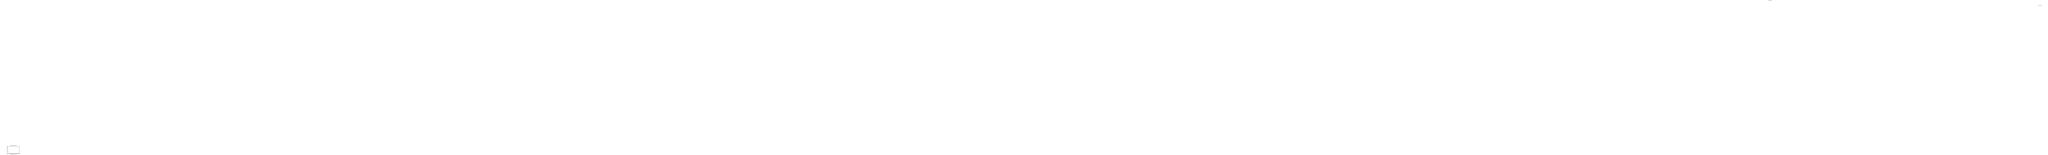

In [72]:
for source_index in range(len(names_infield_1Jy)):
    #print(index,'%.3f,%.3f,%s'%(ra_,dec_,name_),peak_f_)
    #fig.add_label(ra_,dec_,'%.3f,%.3f'%(ra_,dec_),color='yellow',fontsize=14)    
    print(source_index)
    plot_source_lightcurve(source_index,path_157,skymodeldata_select_infield_1Jy,prefix='briggsplus1')

In [ ]:
def return_table_source(path,ra,dec,intmjd0=58200):
    obsnums=get_obsids(path)
    no_select__obsids=[]
    no_table_obsids=[]
    with_noise_obsids=[]
    df_ = pd.DataFrame(columns=["obsid", "mjd", "freq","flux","flux_err","peak_flux"])
    #mjd0=Time(obsnums[0], format='gps').mjd
    #intmjd0=math.floor(mjd0)   
    for obsid in obsnums:              
        stokes_file_I,freq_central,freq_delta=get_stokes_image_freq_err_of_obsid(path,obsid)
        freq=int(freq_central)        
    #print(stokes_file_I)
    #print(freq_central,freq_delta)
        table_=read_tables(path,obsid)
        if table_:
            select_=table_[abs(table_['ra']-ra)<0.1]
            select_=select_[abs(select_['dec']-dec)<0.1] 
            
            if len(select_)>0:  
                mjd=Time(obsid, format='gps').mjd
                mjdtime_frac=mjd-intmjd0
                
                #date_obs=mjd2datetimenew(mjd)
                #print(date_obs)
                flux=select_['int_flux'].quantity[0]
                flux_err=select_['err_int_flux'].quantity[0]
                peak_flux=select_['peak_flux'].quantity[0]                
                color=color_dict_band[freq]
                
                if flux_err >0 and flux_err<1.0:               
                    df_=df_.append(
                        pd.Series({"obsid":obsid, "mjd":mjd,"freq":freq,
                        "flux":flux,"flux_err":flux_err,"peak_flux":peak_flux}), 
                        ignore_index=True)                
                else:
                    with_noise_obsids.append(obsid)                    
            #print(obsid,freq_central,select_['int_flux'].quantity[0],select_['err_int_flux'].quantity[0])
            #print('****************************************')               
            else:
                no_select__obsids.append(obsid)
        else:
            no_table_obsids.append(obsid)
            
    return no_table_obsids,no_select__obsids, with_noise_obsids,df_


def get_bad_obsid_lightcurve(source_index,path,skymodeldata_select_infield):   
    ra,dec,name_source=(skymodeldata_select_infield[source_index]['ra'],
                    skymodeldata_select_infield[source_index]['dec'],
                    skymodeldata_select_infield[source_index]['Name'])

    #print(ra,dec,name_source)
    intmjd0=58221
    no_table_obsids,no_select__obsids, with_noise_obsids,df_=return_table_source(path,ra,dec,intmjd0=intmjd0)
    
    for i in with_noise_obsids:
        print('noise',i,name_source)
        
    df_bad=df_[df_['flux_err']>0.1]    
    
    for j in df_bad['obsid']:
        print('flux_err',j,name_source)        
        


In [ ]:
get_bad_obsid_lightcurve(3,path_done,skymodeldata_select_infield)

In [ ]:
for source_index in range(18):
    get_bad_obsid_lightcurve(source_index,path_done,skymodeldata_select_infield)

## mv_within5deg

In [ ]:
def move_dirfile(orgindir,destinationdir):
    if os.path.exists(orgindir):
        #os.system('mv %s %s'%(orgin_dir,destination_dir))
        shutil.move(orgindir,destinationdir)
        #print(orgin_dir,'moving')

def move_mszipfile(orgindir,destinationdir):
    if os.path.isfile(orgindir):
        os.system('mv %s %s'%(orgindir,destinationdir))
        #shutil.move(orgin_dir,destination_dir)
        print(orgindir,'moving')

In [ ]:
import os,sys,re
import time
from datetime import datetime
import numpy as np
from astropy.io import fits
import shutil



In [ ]:
dir_G0044_calibrated='/share/home/qguo/eor_data/G0044_calibrated'
#obsnums=get_obsids(dir_G0044_calibrated)     

dir_G0044_D0013_cali_false='/share/home/qguo/eor_data/G0044_D0013_cali_false'
obsnums=get_obsids(dir_G0044_D0013_cali_false)

# Variability measures

## modulation index

<span style="font-size:larger;">
$m=\frac{\sigma_s}{\bar{S}}$
</span>     

%\begin{displaymath}
<span style="font-size:larger;">
$\bar{S}=\frac{\sum_{i=1}^{n}\, (\frac{S_i}{\sigma_i^2})}{\sum_{i=1}^{n}\,(\frac{1}{\sigma_i^2})}$
</span>    
%\end{displaymath}

## chi-square of lc

<span style="font-size:larger;">
$\chi_{lc}^2=\sum_{i=1}^{n} \frac{(S_i-\bar{S})^2}{\sigma_i^2}  $
</span>     

<span style="font-size:larger;">
$\chi_{red}^2= \frac{\chi_{lc}^2}{n-1}$
</span>   

# spectrum

In [ ]:
for day in range(58221,58239):

    PKS0736_day=df_PKS0736[(df_PKS0736['mjd']-day)<1]
    PKS0736_day=PKS0736_day[(PKS0736_day['mjd']-day)>0]
    
    if len(PKS0736_day)>0:
        fig = plt.figure(figsize=(6, 6))
        ax=fig.add_subplot(1,1,1)
        ax.errorbar(PKS0736_day['freq'],PKS0736_day['flux'],yerr=PKS0736_day['flux_err'],fmt='o',color='black', ls='',label=str(day))
        handles, labels = ax.get_legend_handles_labels()
        hdl = [h[0] for h in handles]
    # use them in the legend
        by_label = OrderedDict(zip(labels, hdl)) 
        ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0.0, 1.0),
          loc=2, numpoints=1,ncol=1, fontsize=11.)
        ax.set_xlabel(r'$freq ({MHz})$', labelpad=10)
        ax.set_ylabel(r'$flux ({Jy})$', labelpad=10)
        ax.set_title(str(day))
        set_ax_tick(ax)
        set_ax_locator(ax,xma=20,xmi=10,yma=0.1,ymi=0.05)
        plt.rcParams['font.size'] = 18
        plt.rcParams['axes.linewidth'] = 2
        fig.savefig('%s/%s.png'%(path_spec,day), dpi=400, transparent=False, bbox_inches='tight')
    #plt.errorbar(df_PKS0736['freq'],df_PKS0736['flux'],yerr=df_PKS0736['flux_err'],ls='')
    

In [ ]:
import numpy
print(numpy.__version__)

import astropy
print(astropy.__version__)

import six
print(six.__version__)

import matplotlib
print(matplotlib.__version__)

import struct
print(struct.__version__)

## notdown_yet

In [ ]:
job_file = '/share/home/blv/MWAdata/qguo_data/G0044/within5deg/within5deg.txt'
obsnums_within5deg=np.loadtxt(job_file, dtype=np.str, unpack=True, usecols=[0])
path='/share/home/blv/MWAdata/qguo_data/G0044/within5deg/'
print(len(obsnums_within5deg))

In [ ]:
obsnum='1207652304'
print("taql 'NELEMENTS([select distinct TIME from %s.ms])'"%obsnum)
#os.system("taql 'NELEMENTS([select distinct TIME from ${obsnum}.ms])'")

## pbaddimg

In [ ]:
import math
def return_good_table(path):

    obsnums=get_obsids(path)
    no_select_PKS0736_obsids=[]
    no_table_obsids=[]
    with_noise_obsids=[]
    df_PKS0736 = pd.DataFrame(columns=["obsid", "mjd", "freq","flux","flux_err"])

    for obsid in obsnums:              
        stokes_file_I,freq_central,freq_delta=get_stokes_freq(path,obsid)
        freq=int(freq_central)
    #print(stokes_file_I)
    #print(freq_central,freq_delta)
        table_PKS0736=read_tables(path,obsid)
        if table_PKS0736:
            select_PKS0736=table_PKS0736[abs(table_PKS0736['ra']-114.8251408)<0.1]
            select_PKS0736=select_PKS0736[abs(select_PKS0736['dec']-1.6179497)<0.1]    
            if len(select_PKS0736)>0: 
                mjd=Time(obsid, format='gps').mjd
                flux=select_PKS0736['int_flux'].quantity[0]
                flux_err=select_PKS0736['err_int_flux'].quantity[0]                
                if flux_err>0.1:
                    #ax.text(mjdtime_frac*24,flux,str(obsid))
                    with_noise_obsids.append(obsid)
            #print(obsid,freq_central,select_PKS0736['int_flux'].quantity[0],select_PKS0736['err_int_flux'].quantity[0])
            #print('****************************************')
                else:               
                    df_PKS0736=df_PKS0736.append(pd.Series({"obsid":obsid, "mjd":mjd,"freq":freq,"flux":flux,"flux_err":flux_err}), ignore_index=True)
              
            else:
                no_select_PKS0736_obsids.append(obsid)
        else:
            no_table_obsids.append(obsid)
            
    return no_table_obsids,no_select_PKS0736_obsids, with_noise_obsids,df_PKS0736

In [ ]:
path='/share/home/blv/MWAdata/qguo_data/G0044/within5deg/'
no_table_obsids,no_select_PKS0736_obsids, with_noise_obsids,df_PKS0736=return_good_table(path)
df_PKS0736=df_PKS0736.sort_values(by='freq')
df_PKS0736=df_PKS0736.reset_index(drop=True)

In [ ]:
if not os.path.exists(os.path.join(path,'addimg')):
    os.mkdir(os.path.join(path,'addimg'))

for freq in df_PKS0736['freq']:
    add_img_dir=os.path.join(path,'addimg',str(freq))  
    if not os.path.exists(add_img_dir):
        os.mkdir(add_img_dir)

for index,(obsid,freq) in enumerate(zip(df_PKS0736['obsid'],df_PKS0736['freq'])):
    stokes_file_I=get_stokes_file(path,obsid)
    add_img_dir=os.path.join(path,'addimg',str(freq))
    obsid_path=os.path.join(path,obsid)
    
    if stokes_file_I:
        if not os.path.exists(os.path.join(add_img_dir,'first_%s-XX-image.fits'%obsid)):
            #print('cp %s %s'%(stokes_file_I,add_img_dir))
            #os.system('cp %s %s'%(stokes_file_I,add_img_dir))  
            os.system('cp %s/%s_first-XX-image.fits %s/first_%s-XX-image.fits'%(obsid_path,obsid,add_img_dir,obsid)) 
            os.system('cp %s/%s_first-XY-image.fits %s/first_%s-XY-image.fits'%(obsid_path,obsid,add_img_dir,obsid)) 
            os.system('cp %s/%s_first-XYi-image.fits %s/first_%s-XYi-image.fits'%(obsid_path,obsid,add_img_dir,obsid)) 
            os.system('cp %s/%s_first-YY-image.fits %s/first_%s-YY-image.fits'%(obsid_path,obsid,add_img_dir,obsid))                         
            
            os.system('cp %s/beam-*.fits %s'%(obsid_path,add_img_dir)) 

In [ ]:
for index,(obsid,freq) in enumerate(zip(df_PKS0736['obsid'],df_PKS0736['freq'])):
    stokes_file_I=get_stokes_file(path,obsid)
    add_img_dir=os.path.join(path,'addimg',str(freq))
    obsid_path=os.path.join(path,obsid)    
    os.chdir(add_img_dir)
    #print(add_img_dir)   
    #if not os.path.exists('integrated-stokes-I.fits'):
    print(freq,'pbaddimg integrated-stokes first_%s image.fits beam-first-%s'%(obsid,obsid))
    os.system('pbaddimg integrated-stokes first_%s image.fits beam-first-%s'%(obsid,obsid))

# read_integrated-stokes

In [ ]:
bands_all

In [ ]:
def get_aegean_integrated_table(path,freq):
    if os.path.exists(os.path.join(path,str(freq))):
        os.chdir(os.path.join(path,str(freq)))  
        print(os.path.join(path,str(freq)))
    if  os.path.exists('integrated-stokes-I.fits'):
        if not os.path.exists('integrated-stokes-I_out_comp.fits'):
            print(freq)
            bane_com='BANE integrated-stokes-I.fits'
            print(bane_com)
            os.system(bane_com)
            aegean_com='aegean --telescope=mwa --autoload integrated-stokes-I.fits'+ ' --table integrated-stokes-I_out.fits'
            print(aegean_com)
            os.system(aegean_com)
            print()
        else:
            print('bane done for ',path,freq)
    else:
        print('no integrated-stokes-I.fits')

In [ ]:
addimgdir_root='/share/home/blv/MWAdata/qguo_data/G0044/within5deg/addimg'
for freq in bands_all:
    get_aegean_integrated_table(addimgdir_root,freq)

In [ ]:
def read_integrated(table_path):
    table_PKS0736 = Table.read(table_path)
        #print(table_PKS0736)
    return table_PKS0736

In [ ]:
for freq in bands_all:
    table_path=os.path.join(addimgdir_root,str(freq),'integrated-stokes-I_out_comp.fits')   
    if os.path.exists(table_path):
        table_PKS0736=read_integrated(table_path)          
        select_PKS0736=table_PKS0736[abs(table_PKS0736['ra']-114.8251408)<0.1]
        select_PKS0736=select_PKS0736[abs(select_PKS0736['dec']-1.6179497)<0.1]
        if len(select_PKS0736)>0:
            flux=select_PKS0736['int_flux'].quantity[0]
            flux_err=select_PKS0736['err_int_flux'].quantity[0] 
            print(freq,flux,flux_err)  

In [ ]:
for i in datadirs:
    addimgdir_root=os.path.join(datadirs_root,i,'addimg')
    for freq in bands_all:
        table_path=os.path.join(addimgdir_root,str(freq),'integrated-stokes-I_out_comp.fits')   
        if os.path.exists(table_path):
            table_PKS0736=read_integrated(table_path)          
            select_PKS0736=table_PKS0736[abs(table_PKS0736['ra']-114.8251408)<0.1]
            select_PKS0736=select_PKS0736[abs(select_PKS0736['dec']-1.6179497)<0.1]
            if len(select_PKS0736)>0:
                flux=select_PKS0736['int_flux'].quantity[0]
                flux_err=select_PKS0736['err_int_flux'].quantity[0] 
                print(i,freq,flux,flux_err)     

In [ ]:
table_PKS0736.colnames

In [ ]:
table_PKS0736_More1Jy=table_PKS0736[table_PKS0736['int_flux']>1]

In [ ]:
len(table_PKS0736_More1Jy)

## compare model and integrated

### def plot_skymodel_cmap

In [ ]:
def plot_skymodel_cmap(skymodeldata,obsid,marker='.'):
    c_icrs_skymodeldata=SkyCoord(ra=skymodeldata['ra']*u.deg, dec=skymodeldata['dec']*u.deg, frame='icrs')
    #color=skymodeldata['peak_flux']
    #size=skymodeldata['peak_flux']
    cax=ax.scatter(x='ra',y='dec',s='peak_flux',data=skymodeldata,c='peak_flux',marker=marker,label=obsid,cmap=cm.coolwarm)
    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')     
    return cax

In [ ]:
def plot_table_cmap(table,marker='.'):
    c_icrs_skymodeldata=SkyCoord(ra=table['ra']*u.deg, dec=table['dec']*u.deg, frame='icrs')
    #color=skymodeldata['peak_flux']
    #size=skymodeldata['peak_flux']
    cax=ax.scatter(x='ra',y='dec',s='int_flux',data=table,c='int_flux',marker=marker,label=obsid,cmap=cm.coolwarm)
    ax.set_xlabel('RA')
    ax.set_ylabel('DEC')     
    return cax

In [ ]:
fig, ax = plt.subplots()

jy_select=0
print(len(skymodeldata[skymodeldata['peak_flux']>jy_select]))
cax=plot_skymodel_cmap(skymodeldata[skymodeldata['peak_flux']>jy_select],obsid)
cbar = fig.colorbar(cax, ticks=[0, 10, 20,30,40,50])
#cbar.ax.set_yticklabels(['Low', 'Medium', 'High'])  # vertically oriented colorbar
#ax.set_xlim(0,50)
ax.plot(114.8251408,1.6179497,marker='*')
